In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

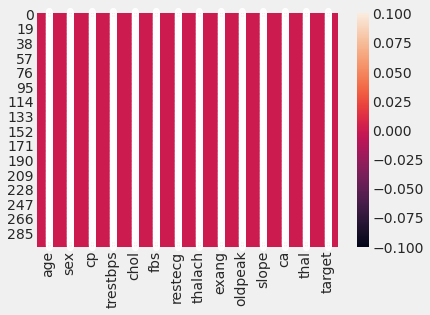

In [6]:
sns.heatmap(df.isna(),annot=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


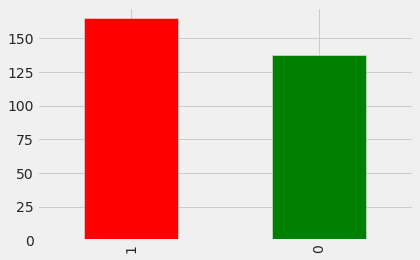

In [13]:
df.target.value_counts().plot(kind='bar',color=['red','green'])

Data is Balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


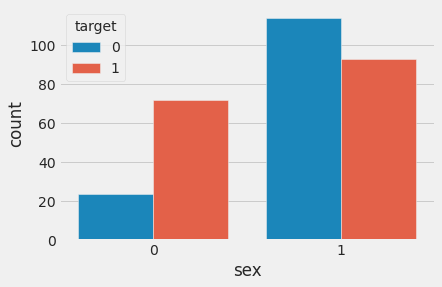

In [15]:
sns.countplot(df['sex'],hue=df['target'])

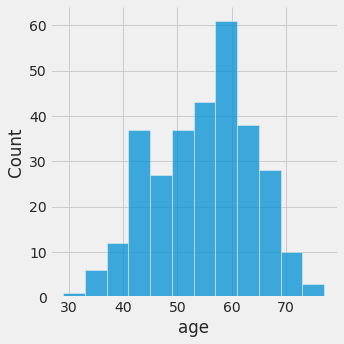

In [16]:
sns.displot(df['age'])

In [23]:
cat=[]
cont=[]

for column in df.columns:
  print('=============================================')
  print(f'{column} : {df[column].unique()}')
  if len(df[column].unique())<=10:
    cat.append(column)

  else:
    cont.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

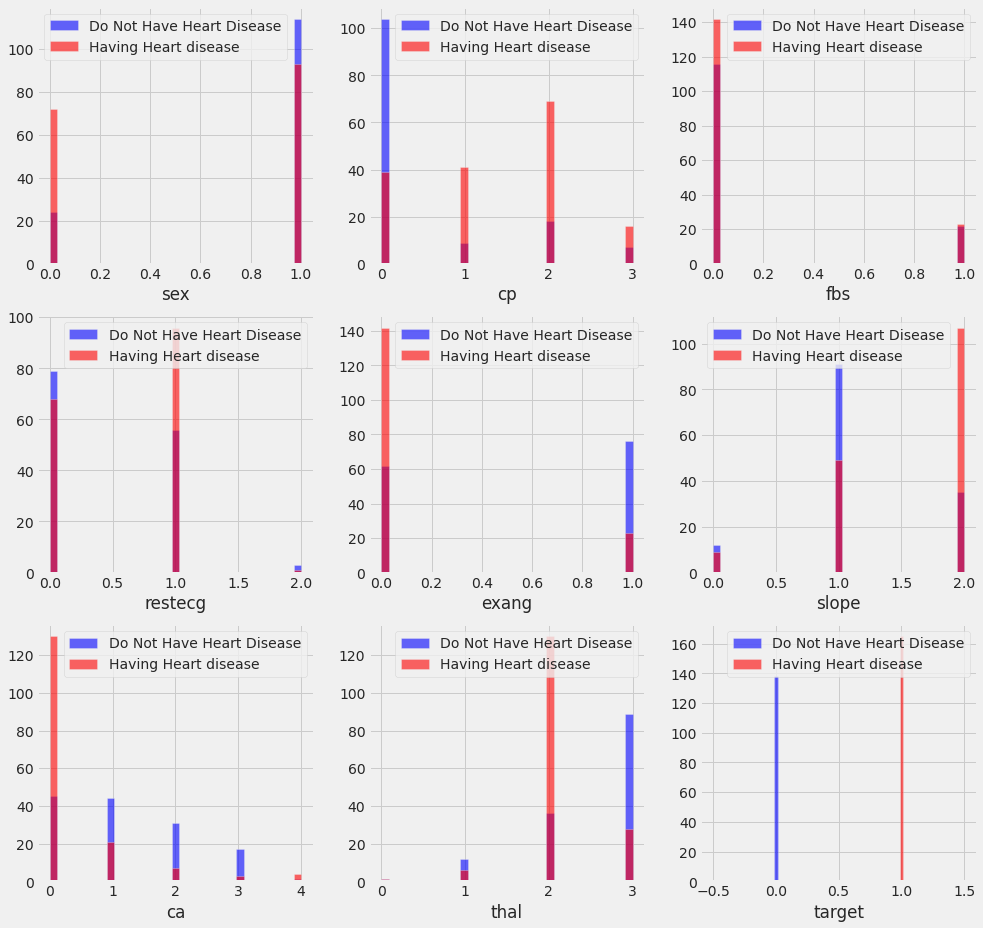

In [28]:
plt.figure(figsize=(15,15))
for i ,column in enumerate(cat,1):
  plt.subplot(3,3,i)
  df[df['target']==0][column].hist(bins=35,color='blue',label='Do Not Have Heart Disease',alpha=0.6)
  df[df['target']==1][column].hist(bins=35,color='red',label='Having Heart disease',alpha=0.6)
  plt.legend()
  plt.xlabel(column)


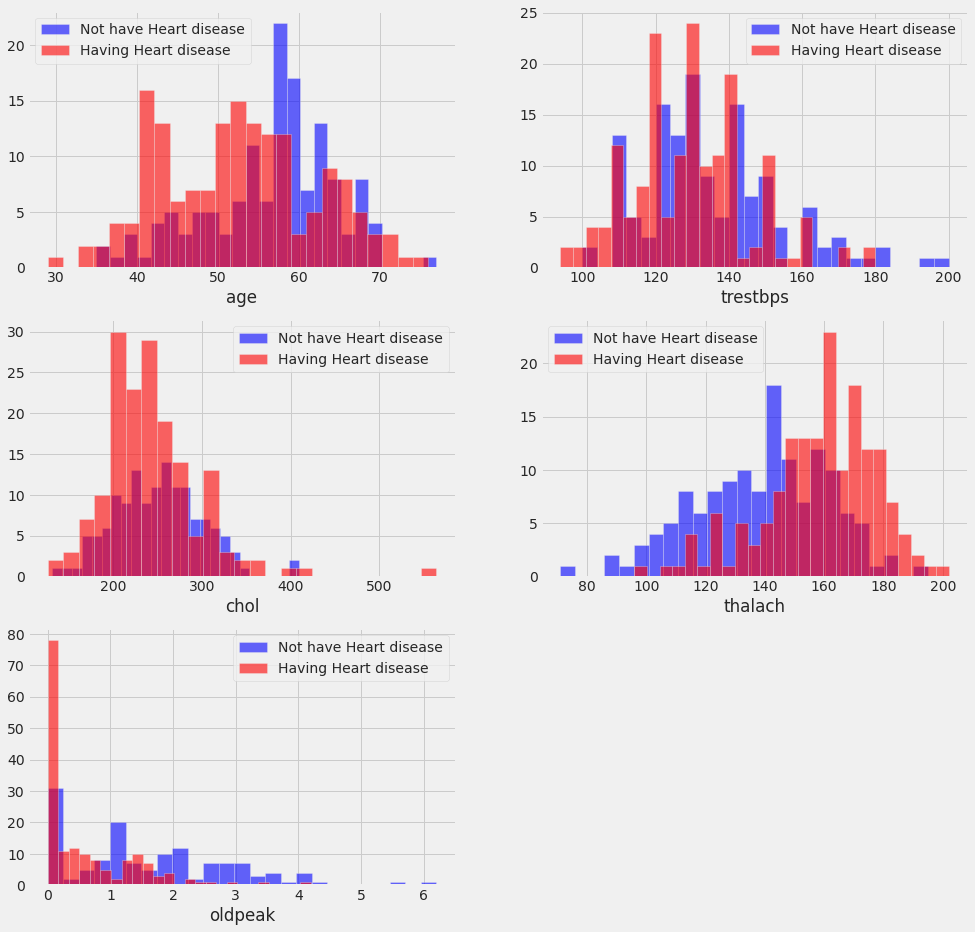

In [30]:
plt.figure(figsize=(15,15))

for i ,column in enumerate(cont,1):
  plt.subplot(3,2,i)
  df[df['target']==0][column].hist(bins=25,color='blue',label='Not have Heart disease',alpha=0.6)
  df[df['target']==1][column].hist(bins=25,color='red',label='Having Heart disease',alpha=0.6)
  plt.legend()
  plt.xlabel(column)


No handles with labels found to put in legend.


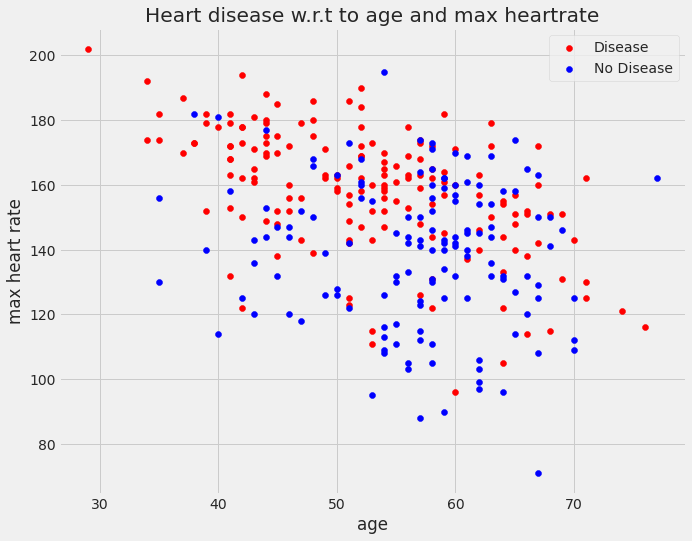

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='red')


plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue')

plt.title('Heart disease w.r.t to age and max heartrate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend()
plt.legend(['Disease','No Disease'])

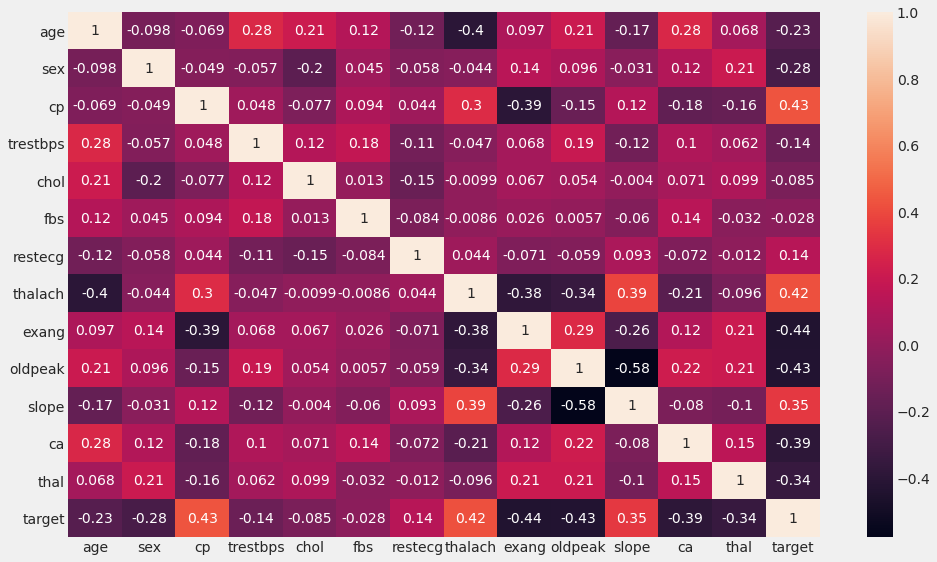

In [35]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

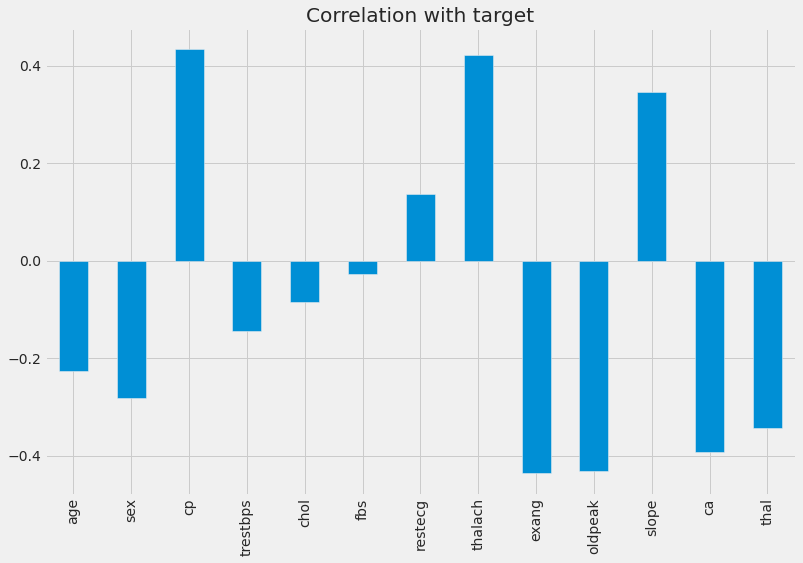

In [36]:
df.drop('target',axis=1).corrwith (df.target).plot(kind='bar',grid=True,figsize=(12,8),title='Correlation with target')

In [37]:
cat.remove('target')

In [38]:
cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [43]:
data=pd.get_dummies(df,columns=cat)

In [44]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [45]:
cont

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data[cont]=sc.fit_transform(data[cont])

In [47]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [63]:
x=df.drop('target',axis=1)
y=df.target

In [64]:
from sklearn.model_selection import train_test_split,cross_val_score

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [81]:
models=[]
models.append(('logreg',LogisticRegression(solver='liblinear')))
models.append(('knn',KNeighborsClassifier(n_neighbors=5)))
models.append(('svc',SVC()))
models.append(('svc',SVC(kernel='linear')))

models.append(('dt',DecisionTreeClassifier()))
models.append(('rf',RandomForestClassifier(n_estimators=200)))

models.append(('xg',XGBClassifier(reg_lambda=1)))




In [82]:
from sklearn.metrics import classification_report as cr,confusion_matrix as cm

In [83]:
for name,model in models:
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  print(model.score(xtrain,ytrain))
  print(f'{name}:-\n{cr(ytest,ypred)}')
  print(f'confusion matrix:-\n{cm(ytest,ypred)}')


0.8443396226415094
logreg:-
              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.86      0.96      0.91        50

    accuracy                           0.89        91
   macro avg       0.90      0.88      0.89        91
weighted avg       0.90      0.89      0.89        91

confusion matrix:-
[[33  8]
 [ 2 48]]
0.7405660377358491
knn:-
              precision    recall  f1-score   support

           0       0.74      0.56      0.64        41
           1       0.70      0.84      0.76        50

    accuracy                           0.71        91
   macro avg       0.72      0.70      0.70        91
weighted avg       0.72      0.71      0.71        91

confusion matrix:-
[[23 18]
 [ 8 42]]
0.660377358490566
svc:-
              precision    recall  f1-score   support

           0       0.72      0.44      0.55        41
           1       0.65      0.86      0.74        50

    accuracy                 

In [85]:
for name,model in models:
  cvs=cross_val_score(model,xtrain,ytrain,cv=5,scoring='accuracy')
  print(f'{name}:-{cvs.mean()}')

logreg:-0.7928017718715392
knn:-0.5988925802879291
svc:-0.5900332225913621
svc:-0.8069767441860465
dt:-0.7121816168327797
rf:-0.7926910299003322
xg:-0.7830564784053157


Well Done....!